In [1]:
import numpy as np
import sklearn
import torch
import scipy
from matplotlib import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/artem/Main/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
N_SAMPLES  = 50
def simple_data_generator(size, random_state=None):
    np.random.seed(random_state)
    return np.random.random(size=(size, 2))

#density_square = [(x1, x2, y1, y2), (...), ...] - coordinates of square with assigned dencity (dencity * size)
def data_generator(size = N_SAMPLES, density_square=[(0, 0.2, 0, 1)], density=[0.5], random_state=None):
    np.random.seed(random_state)
    gen_data_size = 0
    data=np.array([]).reshape(0,2)
    for d, square in zip(density, density_square):
        if(d > 1):
            print("density must be float in range [0, 1]:", density)
            return
        
        size_i=int(size * d)
        x_data_i = np.random.random(size=(size_i, 1)) * (square[1] - square[0]) + square[0]
        y_data_i = np.random.random(size=(size_i, 1)) * (square[3] - square[2]) + square[2]
        data = np.vstack((data, hstack((x_data_i, y_data_i))))
        #print(data)
        gen_data_size += size_i
    if gen_data_size < size:
        data = np.vstack((data, np.random.random(size=(size-gen_data_size, 2))))
    return data

random_state=20
test_datasets_lite = [
    data_generator(50, density=[0.7]),
    data_generator(50, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45]),
    data_generator(50, [(0, 1, 0, 0.2)], [1]),
    data_generator(50, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4]),
    data_generator(50, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45]),
    data_generator(50, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45]),
    data_generator(50, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19]),
]

test_datasets_medium = [
    data_generator(200, density=[0.7], random_state=random_state),
    data_generator(200, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(200, [(0, 1, 0, 0.2)], [1], random_state=random_state),
    data_generator(200, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4], random_state=random_state),
    data_generator(200, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45], random_state=random_state),
    data_generator(200, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(200, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19], random_state=random_state),
]

test_datasets_hard = [
    data_generator(500, density=[0.7], random_state=random_state + 1),
    data_generator(500, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45], random_state=random_state + 1),
    data_generator(500, [(0, 1, 0, 0.2)], [1], random_state=random_state + 1),
    data_generator(500, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4], random_state=random_state + 1),
    data_generator(500, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45], random_state=random_state + 1),
    data_generator(500, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state + 1),
    data_generator(500, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19], random_state=random_state + 1),
]

test_datasets_pro = [
    data_generator(5000, density=[0.7]),
    data_generator(5000, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45]),
    data_generator(5000, [(0, 1, 0, 0.2)], [1]),
    data_generator(5000, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4]),
    data_generator(5000, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45]),
    data_generator(5000, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45]),
    data_generator(5000, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19]),
]

np.random.seed(random_state)
test_datasets_monster = [
    np.random.random(size=(5000, 2)),
    data_generator(5000, density=[0.7], random_state=random_state),
    data_generator(5000, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(5000, [(0, 1, 0, 0.2)], [1], random_state=random_state),
    data_generator(5000, [(0, 0.8, 0, 0.2), (0.8, 1, 0, 1)], density=[0.55, 0.4], random_state=random_state),
    data_generator(5000, [(0, 0.2, 0.6, 0.8), (0.8, 1, 0.7, 0.8)], [0.45, 0.45], random_state=random_state),
    data_generator(5000, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    data_generator(5000, [(0, 0.2, 0, 0.2), (0.2, 0.4, 0.2, 0.4),
                         (0.4, 0.6, 0.4, 0.6), (0.6, 0.8, 0.6, 0.8), (0.8, 1, 0.8, 1)], [0.19, 0.19, 0.19, 0.19, 0.19], random_state=random_state),
]

(200, 1) (30, 1)


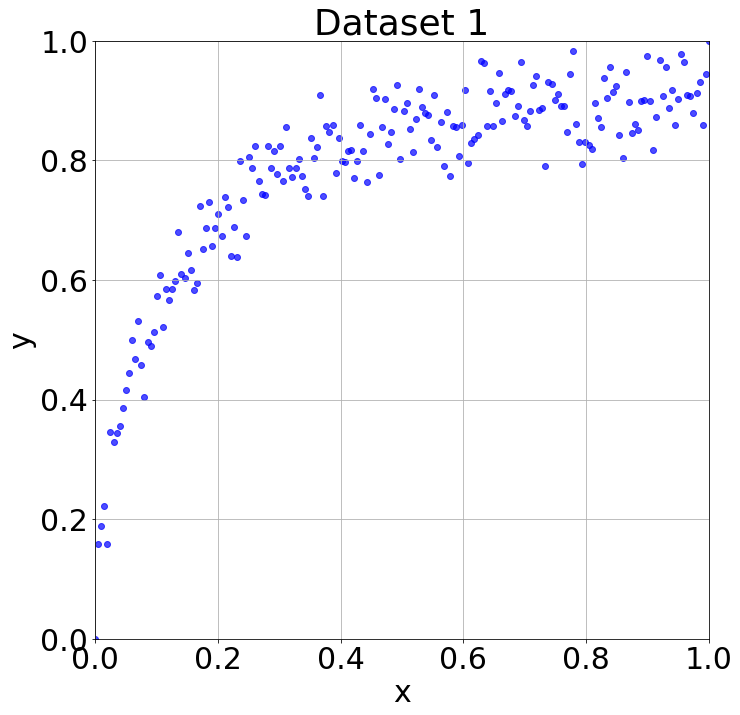

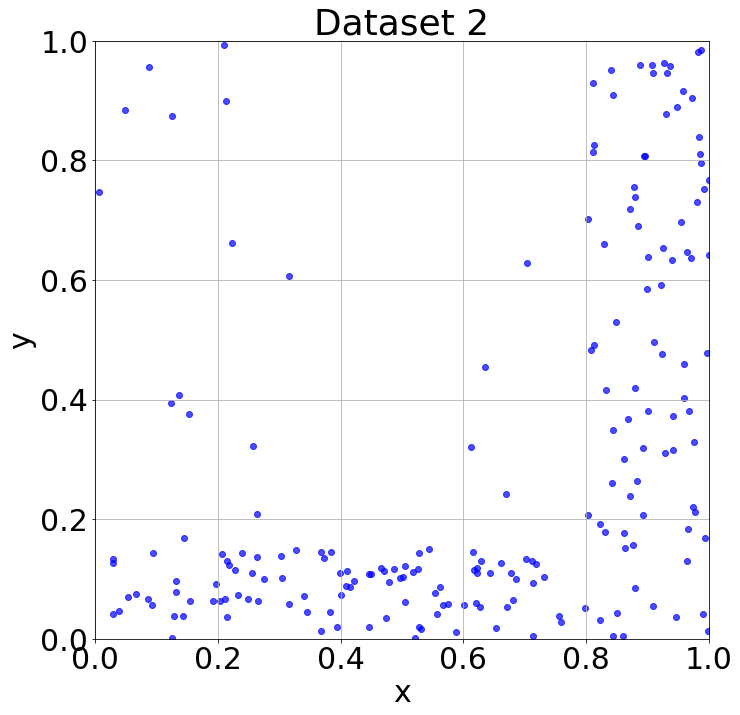

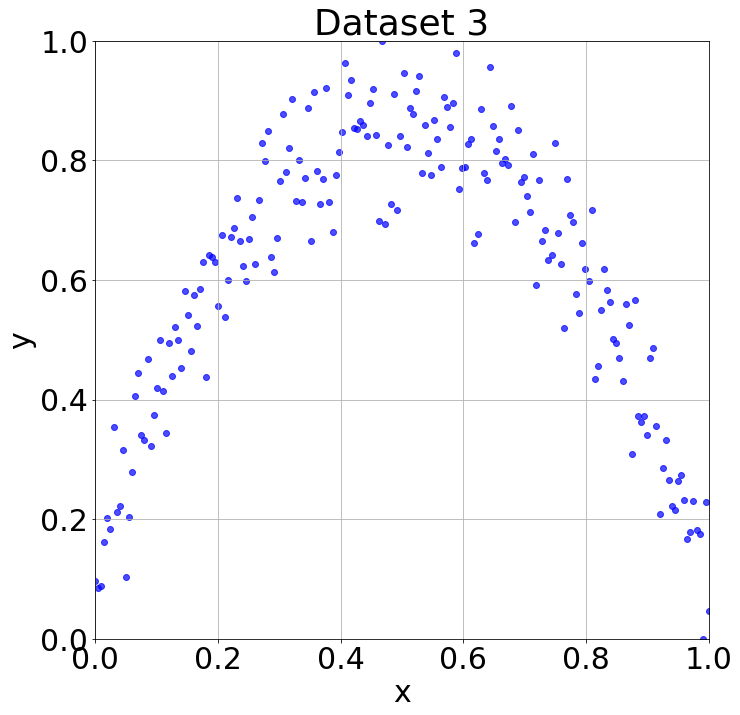

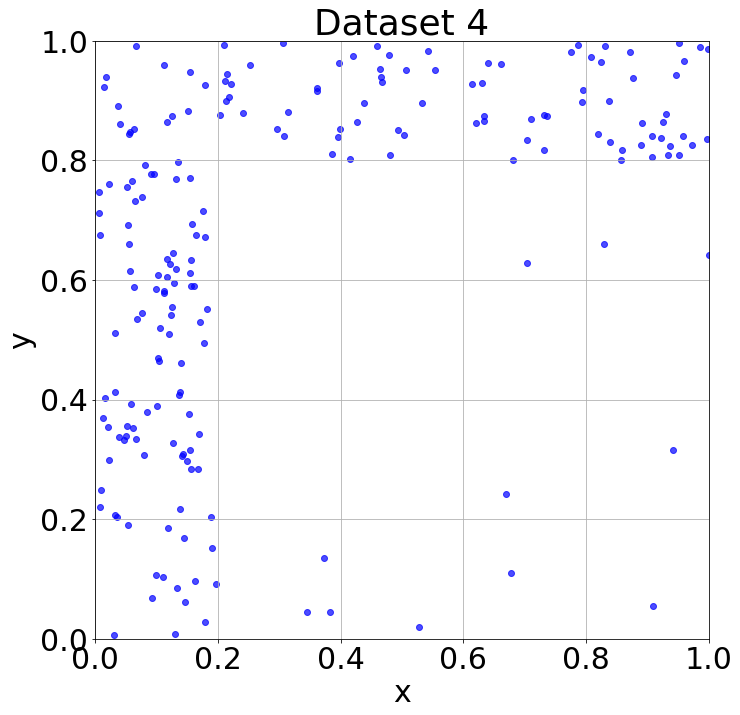

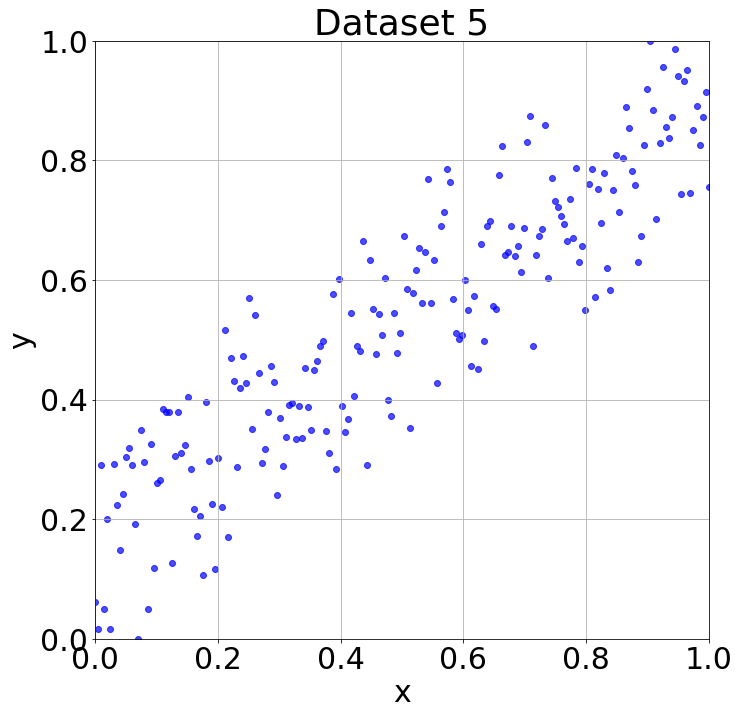

In [3]:
from scipy import stats
PRETTY_DATASETS_CUP = 200
x = np.linspace(0, 8, PRETTY_DATASETS_CUP).reshape(-1, 1)

np.random.seed(20)
noise0 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 8
np.random.seed(26)
noise1 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 8
np.random.seed(30)
noise2 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 4
np.random.seed(36)
noise3 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 4
np.random.seed(40)
noise4 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 3
np.random.seed(46)
noise5 = np.random.random(size=(PRETTY_DATASETS_CUP, 1)) / 3


chi2_y = stats.chi2(df=1).cdf(x) + noise0 - noise1
chi2_y = (chi2_y - np.min(chi2_y)) / (np.max(chi2_y) - np.min(chi2_y))

parab = -4 * (x/8 -  0.5)**2 + 1 + noise2 - noise3
parab = (parab - np.min(parab)) / (np.max(parab) - np.min(parab))

print(x.shape, np.random.random(size=(30, 1)).shape)
linear = x / 8 + noise4 - noise5
linear = (linear - np.min(linear)) / (np.max(linear) - np.min(linear))

np.random.seed(20)
Pretty_datasets = [
    np.hstack((x / 8, chi2_y)),
    data_generator(PRETTY_DATASETS_CUP, [(0, 0.8, 0, 0.15), (0.8, 1, 0, 1)], density=[0.45, 0.38], random_state=random_state),
    np.hstack((x / 8, parab)),
    data_generator(PRETTY_DATASETS_CUP, [(0, 0.2, 0, 0.8), (0, 1, 0.8, 1)], density=[0.45, 0.45], random_state=random_state),
    np.hstack((x / 8, linear))
]

matplotlib.rcParams.update({'font.size': 30})
for i, data in enumerate(Pretty_datasets):
    plt.figure(figsize=[11,11])
    plt.scatter(data[:, 0], data[:, 1], alpha=0.7, marker="o", c="blue")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, 1.)
    plt.ylim(0, 1.)
    plt.grid(True)
    plt.title("Dataset " + str(i + 1))
    plt.savefig("Dataset" + str(i + 1) + ".png")
    plt.show()

In [4]:
def ApproxPlot(x, y, predict, name=""):
    """
    Build 2 graphices in the same plot:
    scatter data plot and approximation curve
    """
    matplotlib.rcParams.update({'font.size': 18})
    y_pred = [predict(x_i) for x_i in x]
    loss = np.sum(np.abs(y - y_pred))
    lin_loss = np.sum(np.abs(y - x))
    print(name, "loss =", loss)
    print("liear function loss =", lin_loss)
    
    plt.figure(figsize=[11,11])
    plt.scatter(x, y, alpha=0.8, marker="o", label="training points")
    x_approx = np.linspace(0, 1, 101)
    y_approx = [predict(x_i) for x_i in x_approx]
    plt.plot(x_approx, y_approx, c = 'r', linewidth=1.5, label="Approximation curve")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(name + " approximation")
    plt.xlim(0, 1.)
    plt.ylim(0, 1.)
    plt.grid()
    plt.legend(loc='best')
    #plt.show()

In [5]:
import time
def RunTests(estimator, dataset, name=""):
    matplotlib.rcParams.update({'font.size': 18})
    for i, data in enumerate(dataset):
        print("Dataset", i, ":")
        start_time = time.time()
        losses = estimator.fit(data[:, 0], data[:, 1])
        print("Fitting time:", (time.time() - start_time) / 60, "min")
        print("alpha, beta:", estimator.alpha, estimator.beta)
        ApproxPlot(data[:, 0], data[:, 1], estimator.PredictProba, name)
        plt.savefig(name + "Plot" + str(i))
        plt.show()
        plt.scatter(np.arange(1, len(losses) + 1), losses, marker='.', c='blue')
        plt.title("Losses")
        plt.xlabel("Epoch")
        plt.ylabel("L1 discrepancy")
        #plt.legend(loc="best")
        plt.grid()
        plt.savefig(name + "losses" + str(i))
        plt.show()

In [6]:
def DBeta__(alpha, beta, x):
    return (x ** (alpha - 1)) * ((1 - x) ** (beta - 1))

def Beta(alpha, beta, x, N=100):
    if x == 0:
        return x 
    
    res1 = torch.tensor(0,     dtype = float)
    res2 = torch.tensor(0,     dtype = float)
    step = torch.tensor(1 / N, dtype = float)
    i = 0
    last = x
    
    while step * i + step / 2 < last:
        res1 += DBeta__(alpha, beta, step * i + step / 2) * step
        i += 1
        
    res2 = res1.clone()
    while step * i + step / 2 < 1:
        res2 += DBeta__(alpha, beta, step * i + step / 2) * step
        i += 1
    
    return res1 / res2

In [7]:
REG=0
SMALL_CONST = 1e-16
class BetaRegression:
    def __init__(self):
        pass
        
    def LossFunc(self, x, y, reg=REG):
        loss = 0
        for i, x_i in enumerate(x):
            loss += torch.abs(self.PredictProba(x_i) - y[i]) + reg * ((self.alpha - 1) ** 2 + (self.beta - 1) ** 2)
        return loss
    
    def PredictProba(self, x):
        return Beta(self.alpha, self.beta, x)
    
    def InitParams(self, random_state=None):
        if random_state != None:
            np.random.seed(random_state)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.alpha = torch.tensor(np.random.random(1)[0] + 2, dtype=float) #(torch.randn(1, dtype=torch.float) + 1) / 2
        self.alpha.to(device)
        self.alpha.requires_grad_()
    
        self.beta = torch.tensor(np.random.random(1)[0] + 2, dtype=float) #(torch.randn(1, dtype=torch.float) + 1) / 2
        self.beta.to(device)
        self.beta.requires_grad_()
    
    def fit(self, x, y, num_epochs=200, lr=0.1, reg=REG, random_state=None):
        self.InitParams(random_state)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        self.best_alpha = self.alpha.item()
        self.best_beta  = self.beta.item()
        self.best_loss  = len(y)
        self.best_ep    = 1


        if isinstance(x, torch.Tensor) == False:
            x = torch.tensor(x, dtype=float, requires_grad = False, device=device)
        if isinstance(y, torch.Tensor) == False:
            y = torch.tensor(y, dtype=float, requires_grad = False, device=device)
        loss = []
        #print(x, y)
        
        optimizer = torch.optim.Adam([self.alpha, self.beta], lr=lr)
        
        self.InitAB = [self.alpha.item(), self.beta.item()]
        
        for ep in np.arange(num_epochs):
            
            loss_i = self.LossFunc(x, y, reg)
            if loss_i < self.best_loss:
                self.best_loss = loss_i.item()
                self.best_alpha = self.alpha.item()
                self.best_beta  = self.beta.item()
                self.best_ep    = ep
            loss_i.backward()
            optimizer.step()
            
            if self.alpha.data < 0:
                self.alpha.data = torch.tensor(SMALL_CONST, dtype=float)
            if self.beta.data < 0:
                self.beta.data = torch.tensor(SMALL_CONST, dtype=float)
            
            optimizer.zero_grad()
            
            loss.append(loss_i.data.item())
        self.loss = loss
        self.alpha = self.best_alpha
        self.beta = self.best_beta
        return loss


Fitting time: 5.715191984176636 min
Losses:
 [89.85009914216174, 89.06700008484701, 88.21841456917137, 87.36325218381828, 86.35408896694724, 85.12354068479279, 83.7743846402082, 82.26256827957175, 80.51766192964058, 78.61524626208444, 76.64411047468282, 74.43135814980229, 72.25413246615986, 70.30352918480594, 68.54863422624322, 66.83741605096284, 65.30640840682479, 64.06024337591785, 63.413661427878004, 63.129194478234304, 63.358252018907315, 64.09770797637698, 64.91322984364581, 65.5387472869668, 65.81858017670449, 65.8111881615192, 65.55514936075087, 65.07456127197904, 64.46269252485823, 63.849356420913836, 63.35183157101376, 63.01406772780316, 62.95074182563388, 62.96148342756788, 63.080064759792386, 63.213190531920255, 63.30578612704702, 63.37474110512289, 63.40840269712074, 63.39399016742254, 63.32372333776668, 63.21409067825752, 63.07598625663268, 62.91585381595735, 62.73817224346257, 62.55444317693355, 62.40307672438046, 62.287785062574635, 62.18896635114814, 62.14147897286264, 

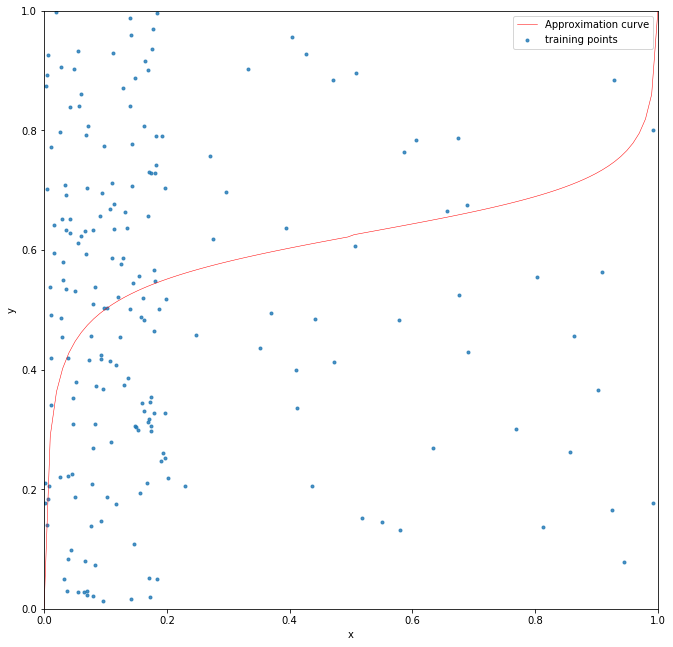

In [62]:
# ADAM, a,b + 2, ep=100, lr=0.1 BAD
import time
data = test_datasets_medium[0] #data_generator(100, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45])

br = BetaRegression()
start_time = time.time()
losses = br.fit(data[:, 0], data[:, 1], lr=0.1, num_epochs=100)
print("Fitting time:", (time.time() - start_time) / 60, "min")

print("Losses:\n", losses)
print("Best =", br.best_loss)

a1, b1 = br.alpha, br.beta
ApproxPlot(data[:, 0], data[:, 1], br.PredictProba)

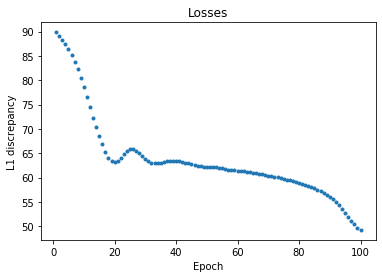

In [63]:
plt.scatter(np.arange(1, len(losses) + 1), losses, marker='.')
plt.title("Losses")
plt.xlabel("Epoch")
plt.ylabel("L1 discrepancy")
plt.show()

Fitting time: 23.978219354152678 min
Losses:
 [91.24186033144325, 90.54648884989712, 89.79678011801029, 89.01044368878028, 88.09601555054235, 87.11327904205433, 86.04714101915977, 84.7582007013972, 83.30611463797919, 81.68875479810092, 79.81398074922636, 77.80644461188542, 75.64659150438297, 73.29098825071273, 71.0161891946386, 69.14371519735498, 67.20697495270221, 65.57637258589104, 64.07496929798987, 63.20265242553223, 62.820217499328834, 62.9648057946252, 63.69448298235753, 64.57382871218755, 65.27599737802458, 65.62214317525468, 65.66278258717912, 65.44328326308325, 64.98947212159584, 64.35937057081202, 63.71656210741136, 63.16867065290275, 62.76922668616391, 62.64115158007923, 62.66054604294378, 62.75863922854542, 62.90069133927812, 63.016383778835234, 63.10123455144789, 63.148447043904774, 63.14352916553504, 63.0733041866687, 62.95634696009898, 62.81002908168719, 62.63815600539571, 62.449899184527986, 62.27228842995996, 62.114957154536626, 61.98981796354414, 61.88452448564453, 61

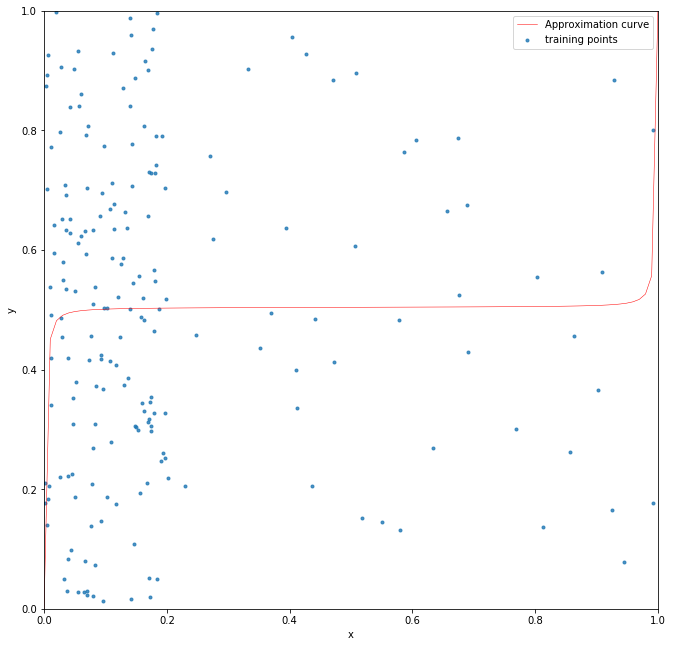

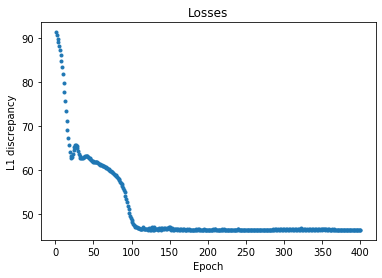

In [64]:
#ADAM + 2, ep=400, lr=0.1
import time
data = test_datasets_medium[0] #data_generator(100, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45])

br = BetaRegression()
start_time = time.time()
losses = br.fit(data[:, 0], data[:, 1], lr=0.1, num_epochs=400)
print("Fitting time:", (time.time() - start_time) / 60, "min")

print("Losses:\n", losses)
print("Best =", br.best_loss)

ApproxPlot(data[:, 0], data[:, 1], br.PredictProba)

plt.scatter(np.arange(1, len(losses) + 1), losses, marker='.')
plt.title("Losses")
plt.xlabel("Epoch")
plt.ylabel("L1 discrepancy")
plt.show()

Fitting time: 18.489821982383727 min
Losses:
 [91.73106839638423, 91.12709600141244, 90.42974160531735, 89.60505337180628, 88.73213759400737, 87.74203691242197, 86.6232363677055, 85.39549159790285, 83.99550847949078, 82.39951556673759, 80.61952819569913, 78.53320452804172, 76.38955599232357, 73.98958525393553, 71.54460474377572, 69.38315992152995, 67.34339140638309, 65.51947979349912, 63.87294608194174, 62.84396900221163, 62.40244250349256, 62.56522149382037, 63.31810800996091, 64.25763548689093, 64.99420684617678, 65.37878202621809, 65.43288020058768, 65.15519495278188, 64.65520855663725, 63.98785546040233, 63.27340130794384, 62.728795079463225, 62.33616971160584, 62.228753600126105, 62.28342089376634, 62.40150629819231, 62.559740646447274, 62.696187469848894, 62.79004931770086, 62.834339977704104, 62.80937229053689, 62.72108333886475, 62.574169631962654, 62.39633103445728, 62.1805045159959, 61.95948534114998, 61.790443122963175, 61.649766981159225, 61.53689584958706, 61.4663570351559

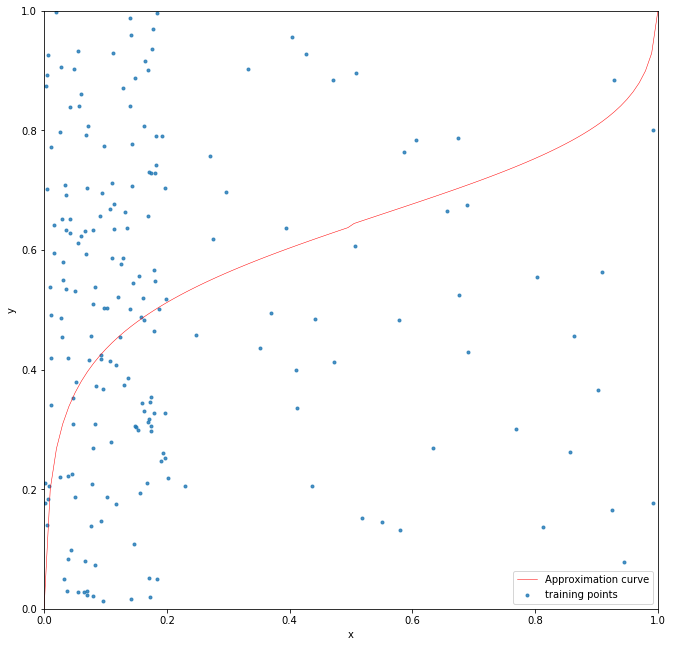

In [72]:
# ADAM, a,b + 2, ep=300, lr=0.1
import time
data = test_datasets_medium[0] #data_generator(100, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45])

br = BetaRegression()
start_time = time.time()
losses = br.fit(data[:, 0], data[:, 1], lr=0.1, num_epochs=300)
print("Fitting time:", (time.time() - start_time) / 60, "min")

print("Losses:\n", losses)
print("Best =", br.best_loss)

a1, b1 = br.alpha, br.beta
ApproxPlot(data[:, 0], data[:, 1], br.PredictProba)

Fitting time: 17.099986545244853 min
Losses:
 [961.23191731143, 847.3067887731104, 741.6115715076655, 644.2552325330955, 555.3176341839076, 474.8210032746714, 402.7335315187157, 338.96345468375597, 283.3566220768666, 235.65552210599344, 195.53811198173355, 162.59558366605918, 136.33090688213866, 116.15044473378082, 101.40910553900709, 91.3982944095491, 85.36273679695309, 82.55640585925104, 82.22666362758675, 83.65992930498183, 86.23901400801175, 89.36507690897906, 92.58493957721137, 95.55911433276911, 98.030581530222, 99.82683913413086, 100.90110932841544, 101.26434805888667, 100.94433131181631, 99.97096068120806, 98.48035035729445, 96.59661910446044, 94.43983731584795, 92.1421193057887, 89.82212397519392, 87.58109238765225, 85.49803847761983, 83.62798272094882, 82.00839706679548, 80.64390727640684, 79.52860679327384, 78.65060412461345, 77.995521605884, 77.52398644993684, 77.19512598626902, 77.00544005303351, 76.89286721111172, 76.83600694134527, 76.81087064654517, 76.79467434704853, 7

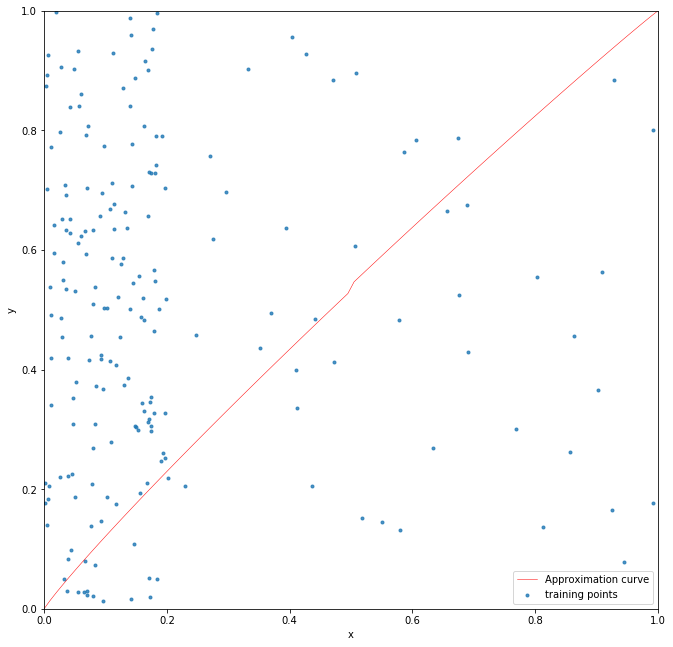

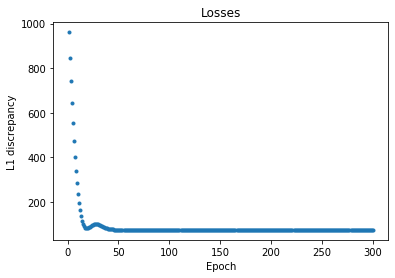

In [73]:
#ADAM + 2, ep=300, lr=0.1, reg=1
import time
data = test_datasets_medium[0] #data_generator(100, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45])

br = BetaRegression()
start_time = time.time()
losses = br.fit(data[:, 0], data[:, 1], lr=0.1, num_epochs=300, reg=1)
print("Fitting time:", (time.time() - start_time) / 60, "min")

print("Losses:\n", losses)
print("Best =", br.best_loss)

ApproxPlot(data[:, 0], data[:, 1], br.PredictProba)

plt.scatter(np.arange(1, len(losses) + 1), losses, marker='.')
plt.title("Losses")
plt.xlabel("Epoch")
plt.ylabel("L1 discrepancy")
plt.show()

Fitting time: 22.863748407363893 min
Losses:
 [91.4417863858839, 91.38132538941785, 91.31955929843497, 91.25645408293472, 91.19197429429197, 91.12608309467724, 91.05874228636921, 90.98991234067057, 90.91955242614253, 90.85292230103646, 90.78690509257586, 90.71953495034815, 90.65071629425732, 90.58036344060618, 90.5083974948878, 90.43474426690592, 90.35933282966384, 90.28589143330676, 90.2179148023404, 90.15014409598946, 90.08276167284826, 90.01419852318288, 89.94412599982475, 89.87242545142244, 89.79898290804293, 89.72368837373625, 89.64704597850478, 89.56847174586773, 89.48941006490455, 89.40881974841393, 89.3261143957387, 89.24118735335739, 89.15393415744731, 89.0642521513589, 88.97204013655255, 88.88130760368958, 88.79189351873126, 88.70022773961945, 88.60617255449162, 88.509593277555, 88.41035785415038, 88.30833647713226, 88.2076714146499, 88.11372456751211, 88.02005992215142, 87.92419353380548, 87.8259389941529, 87.72511289457427, 87.62705429544827, 87.52672575781641, 87.425137333

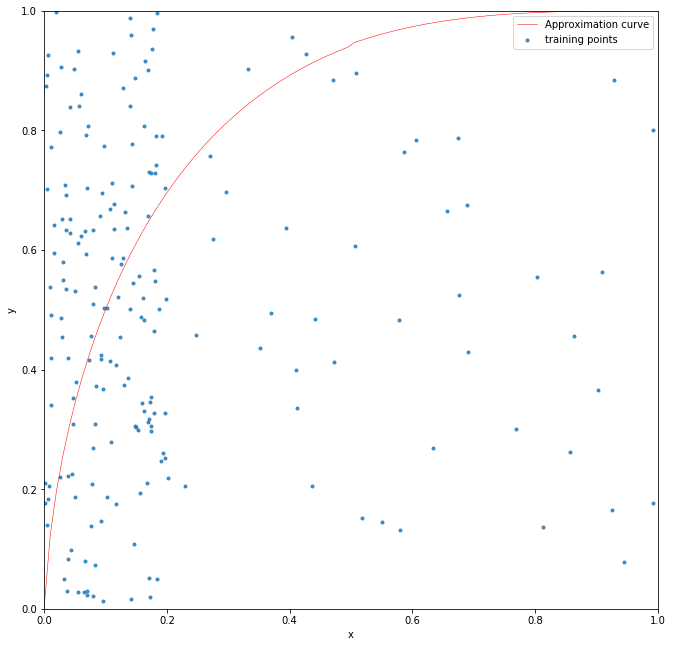

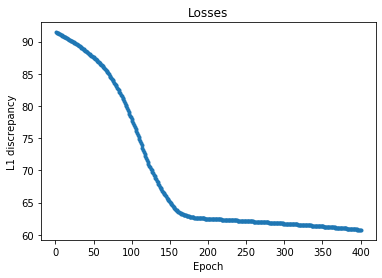

In [65]:
# ADAM + 2, lr=0.01, ep=400
import time
data = test_datasets_medium[0] #data_generator(100, density_square=[(0.2, 0.4, 0., 0.2), (0.5, 0.7, 0.8, 1)], density=[0.45, 0.45])

br = BetaRegression()
start_time = time.time()
losses = br.fit(data[:, 0], data[:, 1], lr=0.01, num_epochs=400)
print("Fitting time:", (time.time() - start_time) / 60, "min")

print("Losses:\n", losses)
print("Best =", br.best_loss)
print("alpha, beta:", br.alpha, br.beta)

ApproxPlot(data[:, 0], data[:, 1], br.PredictProba)

plt.scatter(np.arange(1, len(losses) + 1), losses, marker='.')
plt.title("Losses")
plt.xlabel("Epoch")
plt.ylabel("L1 discrepancy")
plt.show()

In [59]:
from collections import deque
from functools import lru_cache

class GridSearch:
    def __init__(self):
        pass
    
    #HORIZONTAL = 0
    #SLOPE      = 1
    #VERTICAL   = 2
    
    def CalcStepLoss(self, row, col, x, y):
        mask = np.logical_and(x >= col / self.nx, x < (col + 1) / self.nx)
        if row % 2 == 0:
            #print("pred =", math.floor(row / 2) / self.ny)
            return np.sum(np.abs(math.floor(row / 2) / self.ny - y[mask]))
        else:
            #print("k =", (self.nx / self.ny), ", b =", math.floor(row / 2) / self.ny)
            return np.sum(np.abs((self.nx / self.ny) * (x[mask] - col / self.n_col) 
                                 + math.floor(row / 2) / self.ny - y[mask]))
        
    def LinPlot(self, x, y):
        matplotlib.rcParams.update({'font.size': 28})
        x_approx = []
        y_approx = [0]
        for i in np.arange(self.nx + 1):
            x_approx.append(i / self.nx)
            x_approx.append(i / self.nx)
        for el in self.min_path:
            y_approx.append(math.floor(el / 2) / self.ny)
            y_approx.append(math.ceil (el / 2) / self.ny)
        y_approx.append(1)
        
        lin_loss = np.sum(np.abs(y - x))
        #print("LinGrid loss =", self.min_loss)
        #print("liear function loss =", lin_loss)
    
        plt.figure(figsize=[11,11])
        plt.scatter(x, y, alpha=0.8, marker="o", label="training points")

        plt.plot(x_approx, y_approx, c = 'r', linewidth=1.5, label="Approximation curve")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim(0, 1.)
        plt.ylim(0, 1.)
        plt.legend(loc='best')
        plt.title("Grid search approximation")
        plt.grid(True)
        plt.savefig("GridSearchPlot" + str(np.random.randint(1000)) + ".png")
        plt.show()
    
    @lru_cache(maxsize=None)
    def GetLossRec(self, row, col):
        self.rec_iter += 1
        curr_stack = deque()
        #if row >= self.n_row: #Unnecessary?
        #    curr_stack.append(math.inf)  #for pop
        #    return math.inf, curr_stack
        
        if col == self.n_col:
            #curr_stack.append(math.inf)  #for pop
            return 0, curr_stack
            
        #print("(REC)")
        curr_min_loss = math.inf
        curr_jump     = 0
        #curr_stack.append(math.inf)  #for pop
        for vert_jump in np.arange(row, self.n_row - 1, 2):
            SlopeLoss, SlopeStack = self.GetLossRec(vert_jump + 2, col + 1)
            HorizLoss, HorizStack = self.GetLossRec(vert_jump, col + 1)
            SlopeStack = SlopeStack.copy()
            HorizStack = HorizStack.copy()
            SlopeLoss += self.grid_losses[vert_jump + 1, col]
            HorizLoss += self.grid_losses[vert_jump, col]
            
            
            if SlopeLoss < curr_min_loss and SlopeLoss < HorizLoss:
                curr_stack    = SlopeStack
                curr_min_loss = SlopeLoss
                curr_jump     = vert_jump + 1
            elif HorizLoss < curr_min_loss:
                curr_stack    = HorizStack.copy()
                curr_min_loss = HorizLoss
                curr_jump     = vert_jump
            
        #Last iteration
        self.rec_iter += self.n_col - col
        HorizLoss = np.sum(self.grid_losses[self.n_row - 1, col:]) #Vertical top line
        #print("HorizLoss =", HorizLoss)
        if HorizLoss < curr_min_loss:
            curr_min_loss = HorizLoss
            curr_jump = self.n_row - 1
            #Correcting path
            path_len = len(curr_stack)
            curr_stack.clear()
            curr_stack.extend([self.n_row - 1] * path_len)
         
        curr_stack.append(curr_jump)
        return curr_min_loss, curr_stack
        
    #@lru_cache(maxsize=None)
    def fit(self, x, y, nx=10, ny=10, rec=False):
        if nx <= 0 or ny <= 0:
            return math.inf, deque()
        self.nx = nx
        self.ny = ny
        self.n_col = nx
        self.n_row = 2 * ny + 1
        self.min_path  = deque()
        self.min_loss = 0
        
        
        self.grid_shape = (self.n_row, self.n_col)
        self.grid_losses = np.zeros(shape=self.grid_shape)

        for j in np.arange(self.grid_shape[1]):
            for i in np.arange(self.grid_shape[0]):
                self.grid_losses[i, j] = self.CalcStepLoss(i, j, x, y)


        self.rec_iter = 0
        self.min_loss, self.min_path = self.GetLossRec(0, 0)
        #print(self.GetLossRec.cache_info())
        self.GetLossRec.cache_clear()
        #self.min_path.popleft()
        self.min_path = np.array([self.min_path.pop() for _ in np.arange(len(self.min_path))])
        #print(self.grid_losses)
        #print(self.min_path)
        #self.min_path.pop()
        if rec == True:
            gr1 = GridSearch()
            alt_loss1, alt_path1 = gr1.fit(x, y, math.floor(self.nx - 1), self.ny)
            gr2 = GridSearch()
            alt_loss2, alt_path2 = gr2.fit(x, y, self.nx, math.floor(self.ny - 1), rec=True)
        
            if alt_loss1 < self.min_loss and alt_loss1 < alt_loss2:
                self.min_loss = alt_loss1
                self.min_path = alt_path1.copy()
                self.nx       = gr1.nx
                self.ny       = gr1.ny
            if alt_loss2 < self.min_loss:
                self.min_loss = alt_loss2
                self.min_path = alt_path2.copy()
                self.nx       = gr2.nx
                self.ny       = gr2.ny
                
        self.grid_losses = np.flip(self.grid_losses, axis=0)
        
        return self.min_loss, self.min_path
        
        

Excecution time = 0.04200154145558675 min
7.061001063071309
nx, ny = 32 28


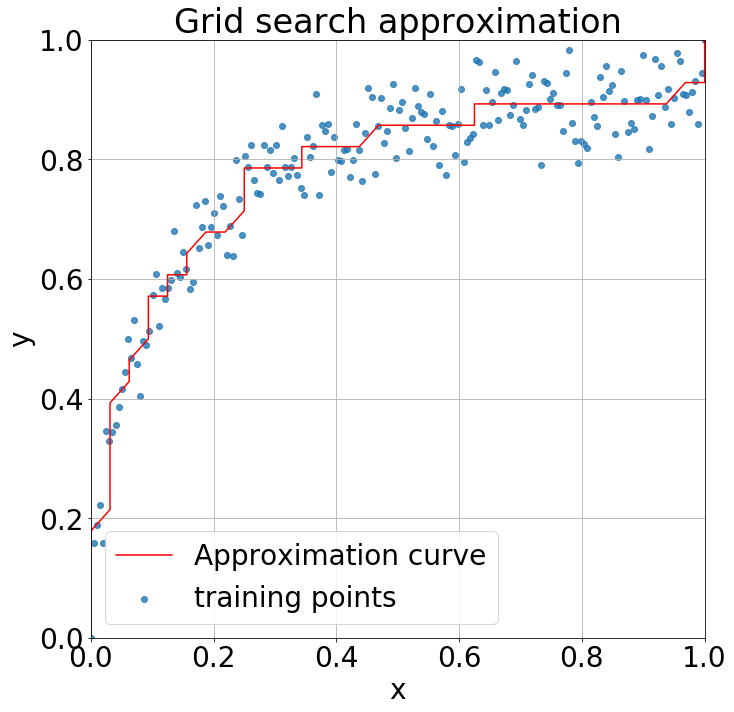

Excecution time = 0.0467313011487325 min
33.489268767701454
nx, ny = 31 29


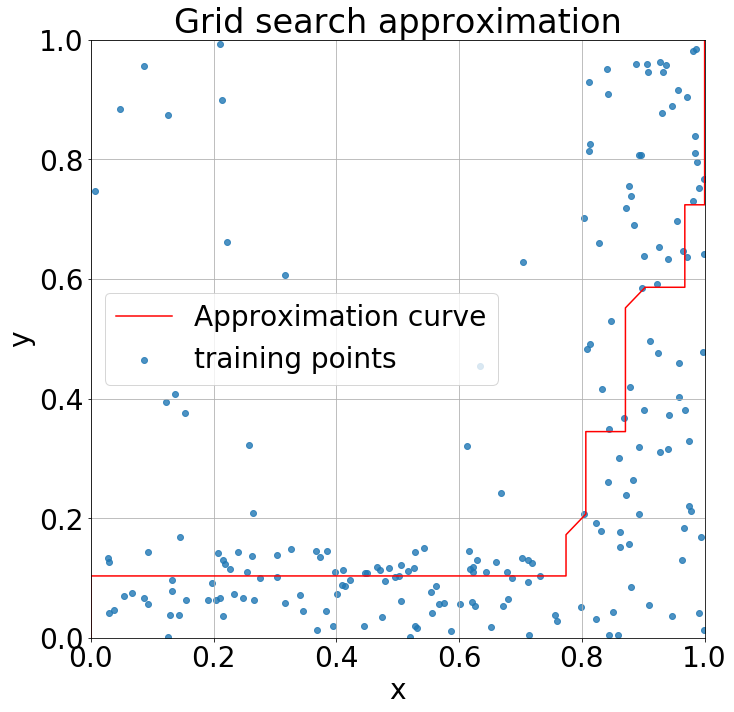

Excecution time = 0.05126784245173136 min
26.879318398739496
nx, ny = 31 16


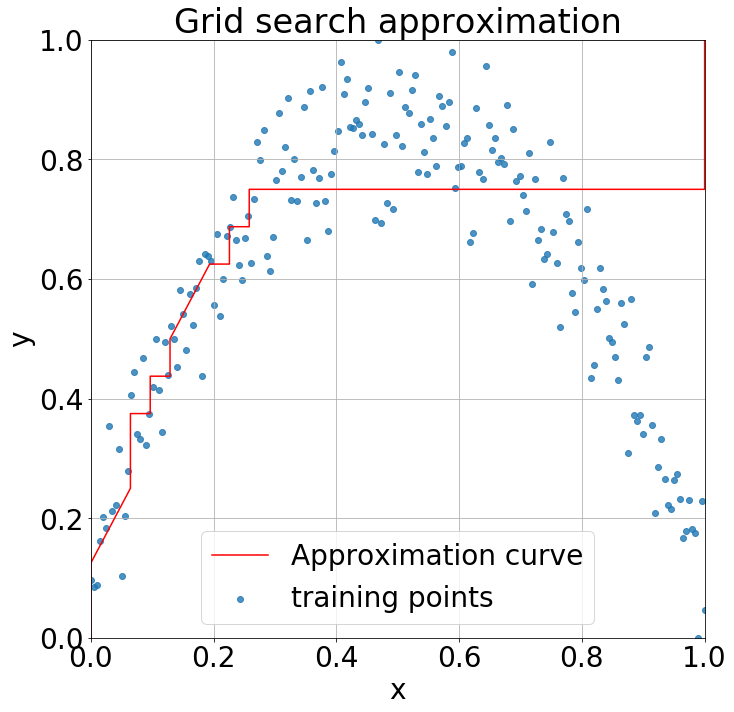

Excecution time = 0.04772771596908569 min
34.85290166327895
nx, ny = 31 24


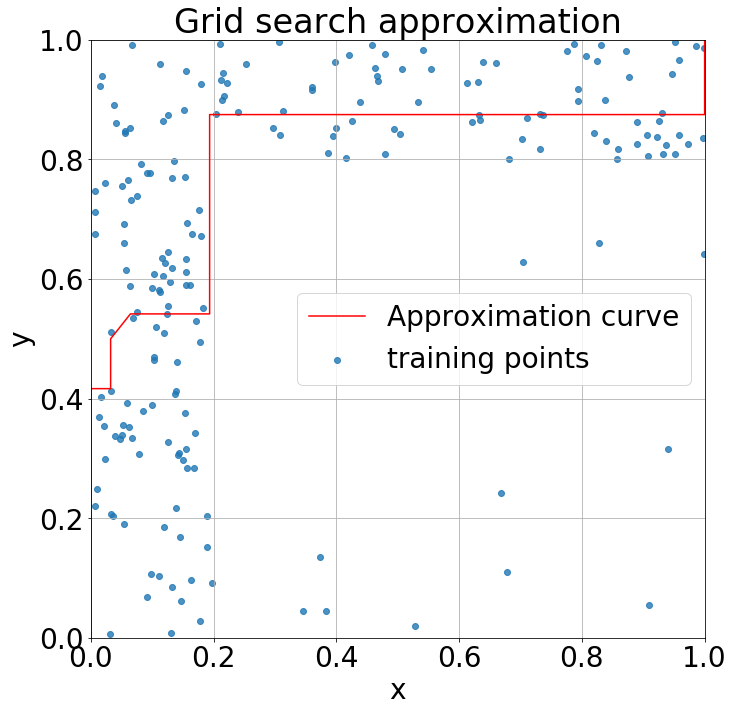

Excecution time = 0.04067194859186808 min
14.862990422709089
nx, ny = 32 31


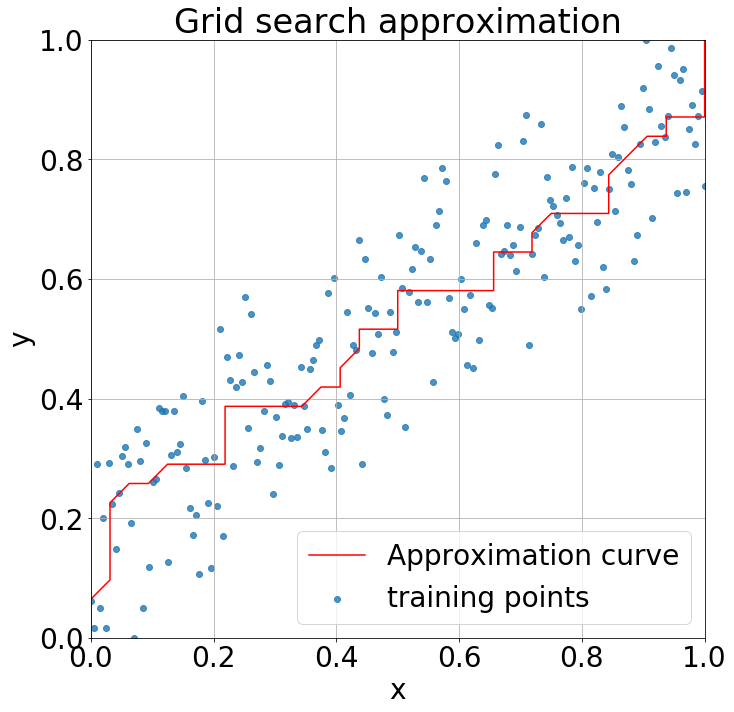

In [45]:
import time
for i, dataset in enumerate(Pretty_datasets):
    gs = GridSearch()
    start_time = time.time()
    lossg, path = gs.fit(dataset[:, 0], dataset[:, 1], nx=32, ny=32, rec=True) # 256, 256
    print("Excecution time =", (time.time() - start_time) / 60, "min")
    print("loss =", lossg)
    print("nx, ny =", gs.nx, gs.ny)
    gs.LinPlot(dataset[:, 0], dataset[:, 1])

In [ ]:
def ApproxPlot(x, y, predict, name=""):
    """
    Build 2 graphices in the same plot:
    scatter data plot and approximation curve
    """
    matplotlib.rcParams.update({'font.size': 20})
    y_pred = [predict(x_i) for x_i in x]
    loss = np.sum(np.abs(y - y_pred))
    lin_loss = np.sum(np.abs(y - x))
    print(name, "loss =", loss)
    print("liear function loss =", lin_loss)
    
    plt.figure(figsize=[11,11])
    plt.scatter(x, y, alpha=0.8, marker="o", label="training points")
    x_approx = np.linspace(0, 1, 101)
    y_approx = [predict(x_i) for x_i in x_approx]
    plt.plot(x_approx, y_approx, c = 'r', linewidth=1.5, label="Approximation curve")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, 1.)
    plt.ylim(0, 1.)
    plt.legend(loc='best')
    plt.show()

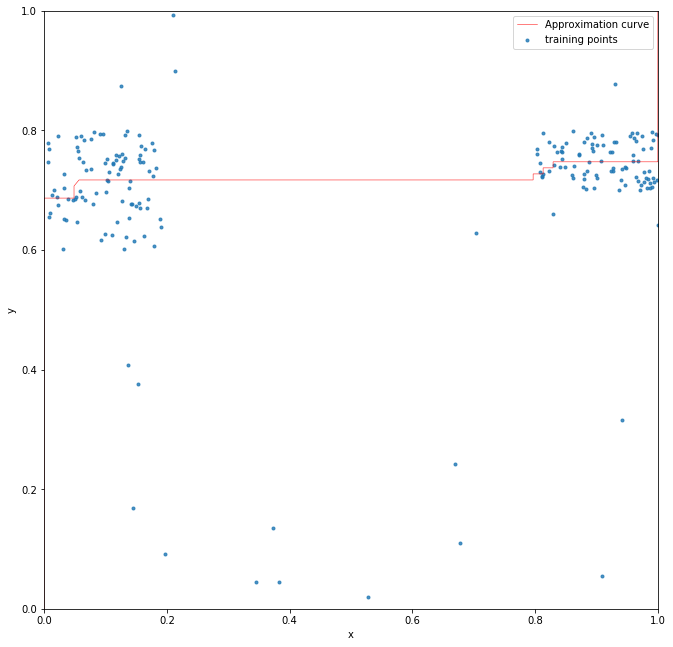

In [20]:
gs.LinPlot(test_datasets_medium[4][:, 0], test_datasets_medium[4][:, 1])

In [107]:
#import logging
#import threading

class GridSearchOpt:
    def __init__(self):
        pass
    
    def CalcStepLoss(self, row, col, x, y):
        mask = np.logical_and(x >= col / self.nx, x < (col + 1) / self.nx)
        if row % 2 == 0:
            #print("pred =", math.floor(row / 2) / self.ny)
            return np.sum(np.abs(math.floor(row / 2) / self.ny - y[mask]))
        else:
            #print("k =", (self.nx / self.ny), ", b =", math.floor(row / 2) / self.ny)
            return np.sum(np.abs((self.nx / self.ny) * (x[mask] - col / self.n_col) 
                                 + math.floor(row / 2) / self.ny - y[mask]))
        
    def LinPlot(self, x, y):
        matplotlib.rcParams.update({'font.size': 20})
        x_approx = []
        y_approx = [0]
        for i in np.arange(self.nx + 1):
            x_approx.append(i / self.nx)
            x_approx.append(i / self.nx)
        for el in self.min_path:
            y_approx.append(math.floor(el / 2) / self.ny)
            y_approx.append(math.ceil (el / 2) / self.ny)
        y_approx.append(1)
        
        lin_loss = np.sum(np.abs(y - x))
        print("LinGrid loss =", self.min_loss)
        print("liear function loss =", lin_loss)
    
        plt.figure(figsize=[11,11])
        plt.scatter(x, y, alpha=0.8, marker=".", label="training points")

        plt.plot(x_approx, y_approx, c = 'r', linewidth=1, label="Approximation curve")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim(0, 1.)
        plt.ylim(0, 1.)
        plt.legend(loc='best')
        plt.title("Grid search approximation")
        plt.savefig("GridSearchPlotNorm" + str(np.random.randint(1000)) + ".png")
        plt.show()
    
    @lru_cache(maxsize=None)
    def GetLossRec(self, row, col):
        self.rec_iter += 1
        curr_stack = deque()
        #if row >= self.n_row: #Unnecessary?
        #    curr_stack.append(math.inf)  #for pop
        #    return math.inf, curr_stack
        
        if col == self.n_col or row == self.n_row:
            #curr_stack.append(math.inf)  #for pop
            return 0, curr_stack
        
        if row == self.n_row - 1:
            curr_stack.extend([self.n_row - 1] * (self.n_col - col))
            return np.sum(self.grid_losses[row, col:]), curr_stack
        
            
        #print("(REC)")
        #curr_min_loss = math.inf
        #curr_jump     = 0
        #curr_stack.append(math.inf)  #for pop
        self.grid_losses[row + 1, col]
        curr_min_loss, curr_stack = self.GetLossRec(row + 2, col + 1)
        curr_min_loss += self.grid_losses[row + 1, col]
        curr_row  = row + 1
        if(math.floor((self.n_row - row) / 2) < self.n_col - col):
            #print("HERE:", math.floor((self.n_row - row) / 2), self.n_col - col)
            HorizLoss, HorizStack = self.GetLossRec(row, col + 1)
            HorizLoss += self.grid_losses[row, col]
            if HorizLoss < curr_min_loss:
                curr_min_loss = HorizLoss
                curr_stack    = HorizStack
                curr_row      = row 
        curr_stack = curr_stack.copy()
        curr_stack.append(curr_row)
            
            
        #curr_jump     = vert_jump
            
        #Last iteration
        #self.rec_iter += 1
        #HorizLoss = np.sum(self.grid_losses[self.n_row - 1, col:]) #Vertical top line
        #print("HorizLoss =", HorizLoss)
        #if HorizLoss < curr_min_loss:
        #    curr_min_loss = HorizLoss
        #    curr_jump = self.n_row - 1
        #    #Correcting path
        #    path_len = len(curr_stack)
        #    curr_stack.clear()
        #    curr_stack.extend([self.n_row - 1] * path_len)
        #    self.arr[col] = self.n_row - 1
         
        return curr_min_loss, curr_stack
        
    
    def fit(self, x, y, nx=10, ny=10, rec=False):
        if nx <= 0 or ny <= 0 or nx < ny:
            return math.inf, deque()
        self.nx = nx
        self.ny = ny
        self.n_col = nx
        self.n_row = 2 * ny + 1
        self.min_path  = deque()
        self.min_loss = 0
        
        
        
        self.grid_shape = (self.n_row, self.n_col)
        self.grid_losses = np.zeros(shape=self.grid_shape)

        for j in np.arange(self.grid_shape[1]):
            for i in np.arange(self.grid_shape[0]):
                self.grid_losses[i, j] = self.CalcStepLoss(i, j, x, y)


        self.arr = np.zeros(self.n_col)
        self.rec_iter = 0
        self.min_loss, self.min_path = self.GetLossRec(0, 0)
        #print(self.GetLossRec.cache_info())
        self.GetLossRec.cache_clear()
        self.min_path = np.array([self.min_path.pop() for _ in np.arange(len(self.min_path))])
        #self.min_path.popleft()
        if rec == True:
            gr1 = GridSearchOpt()
            alt_loss1, alt_path1 = gr1.fit(x, y, math.floor(self.nx - 1), self.ny)
            gr2 = GridSearchOpt()
            alt_loss2, alt_path2 = gr2.fit(x, y, self.nx, math.floor(self.ny - 1), rec=True)
        
            if alt_loss1 < self.min_loss and alt_loss1 < alt_loss2:
                self.min_loss = alt_loss1
                self.min_path = alt_path1.copy()
                self.nx       = gr1.nx
                self.ny       = gr1.ny
            if alt_loss2 < self.min_loss:
                self.min_loss = alt_loss2
                self.min_path = alt_path2.copy()
                self.nx       = gr2.nx
                self.ny       = gr2.ny
        
        self.grid_losses = np.flip(self.grid_losses, axis=0)
        #print(self.grid_losses)
        #print(self.min_path)
        return self.min_loss, self.min_path

Excecution time = 1.276140026251475 min
loss = 7.325490483719278
nx, ny = 127 10
LinGrid loss = 7.325490483719278
liear function loss = 58.22379342695287


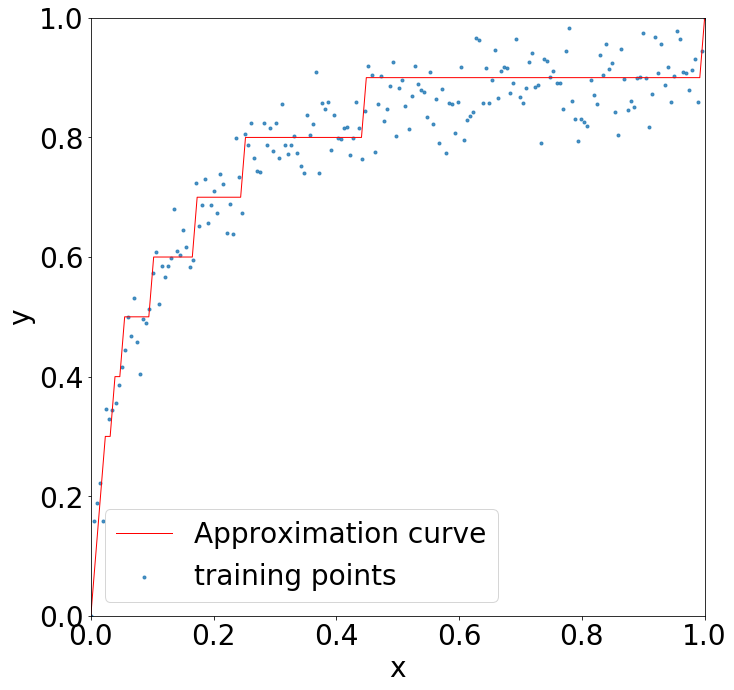

Excecution time = 1.2383482734362283 min
loss = 34.472317007340884
nx, ny = 127 10
LinGrid loss = 34.472317007340884
liear function loss = 74.32547498976234


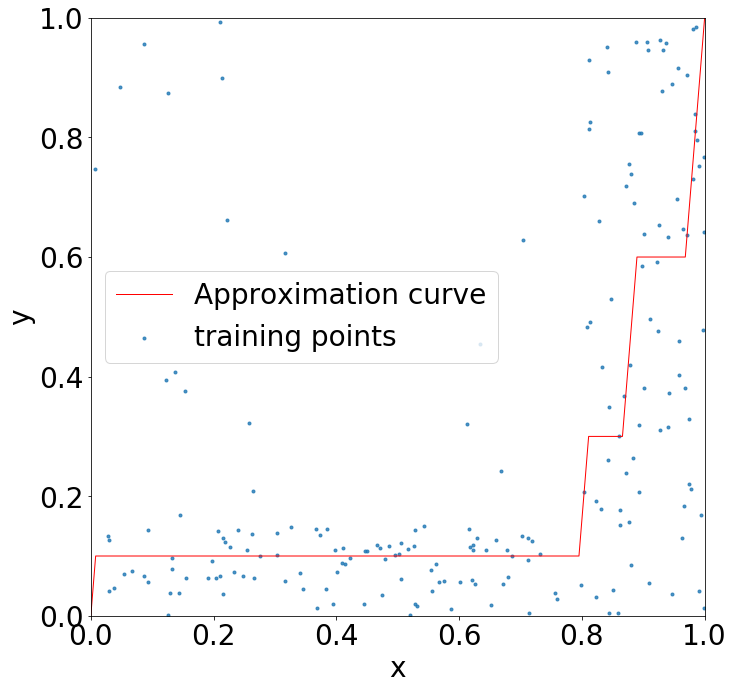

Excecution time = 1.2084804932276407 min
loss = 27.291508281101315
nx, ny = 127 9
LinGrid loss = 27.291508281101315
liear function loss = 69.73840848365876


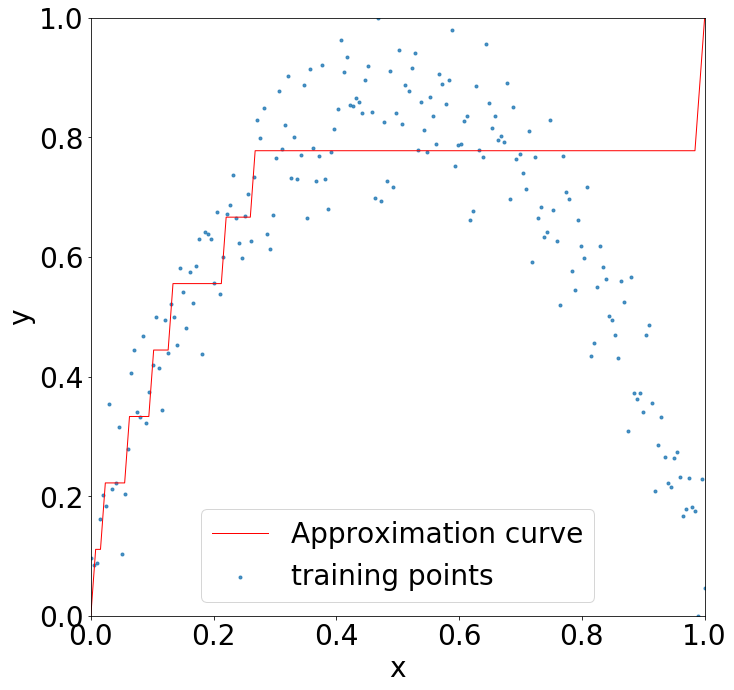

Excecution time = 1.1656717697779337 min
loss = 35.82260368746947
nx, ny = 128 7
LinGrid loss = 35.82260368746947
liear function loss = 74.33146469085386


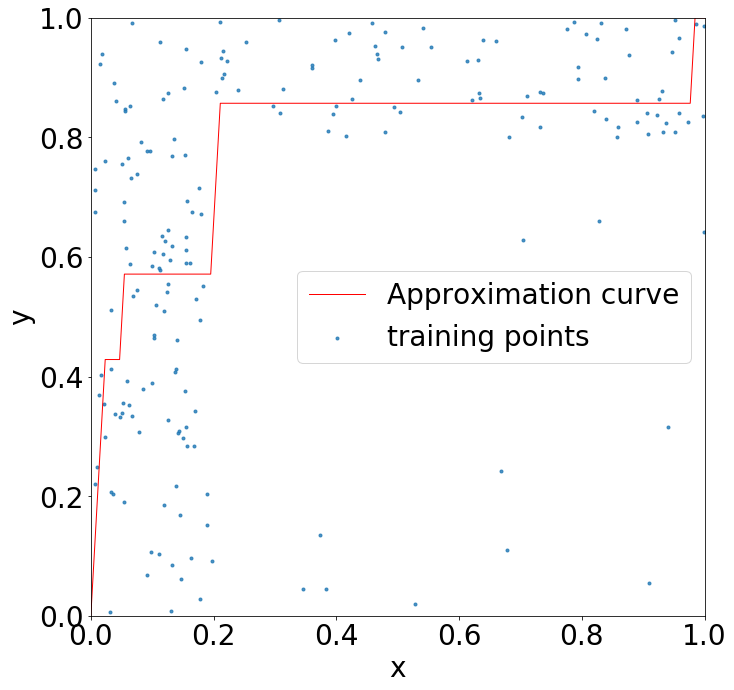

Excecution time = 1.1938003182411194 min
loss = 14.797369348660897
nx, ny = 127 20
LinGrid loss = 14.797369348660897
liear function loss = 21.78666536213388


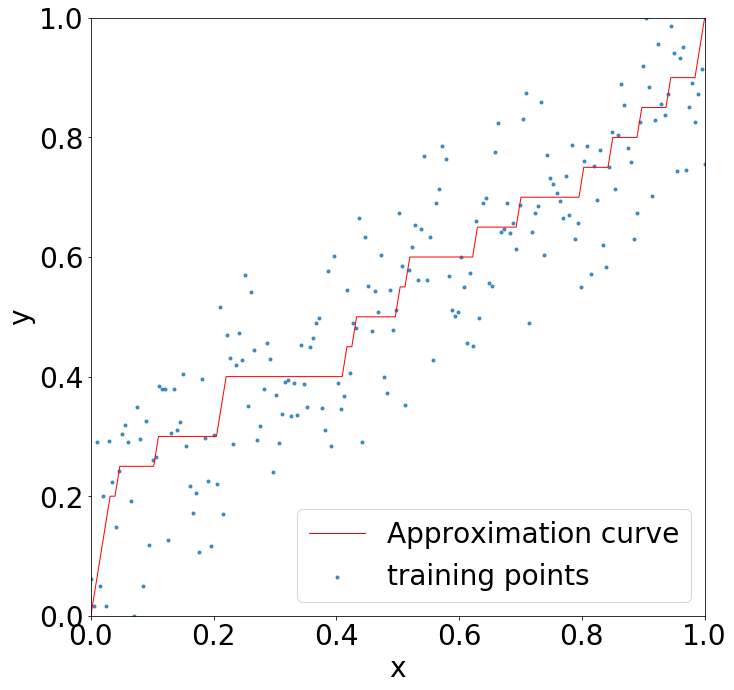

In [108]:
import time
for i, dataset in enumerate(Pretty_datasets):
    gso = GridSearchOpt()
    start_time = time.time()
    lossg, path = gso.fit(dataset[:, 0], dataset[:, 1], nx=128, ny=128, rec=True) # 256, 256
    print("Excecution time =", (time.time() - start_time) / 60, "min")
    print("loss =", lossg)
    print("nx, ny =", gso.nx, gso.ny)
    gso.LinPlot(dataset[:, 0], dataset[:, 1])

In [126]:
REG=0  #1e-1 / 2
SMALL_CONST = 1e-16
class BetaRegression2:
    def __init__(self):
        pass
        
    def LossFunc(self, x, y, reg=REG):
        loss = 0
        for i, x_i in enumerate(x):
            loss += torch.abs(self.PredictProba(x_i) - y[i]) + reg * ((self.alpha - 1) ** 2 + (self.beta - 1) ** 2)
        return loss
    
    def PredictProba(self, x):
        return (self.y2 - self.y1) * Beta(self.alpha, self.beta, (x - self.x1) / (self.x2 - self.x1)) + self.y1
    
    def InitParams(self, random_state=None):
        if random_state != None:
            np.random.seed(random_state)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.alpha = torch.tensor(np.random.random(1)[0] + 2, dtype=float) #(torch.randn(1, dtype=torch.float) + 1) / 2
        self.alpha.to(device)
        self.alpha.requires_grad_()
    
        self.beta = torch.tensor(np.random.random(1)[0] + 2, dtype=float) #(torch.randn(1, dtype=torch.float) + 1) / 2
        self.beta.to(device)
        self.beta.requires_grad_()
    
    def fit(self, x, y, num_epochs=200, lr=0.1, x1=0, x2=1, y1=0, y2=1, reg=REG, random_state=None):
        self.InitParams(random_state)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.y1 = y1
        self.y2 = y2
        self.x1 = x1
        self.x2 = x2

        self.best_alpha = self.alpha.item()
        self.best_beta  = self.beta.item()
        self.best_loss  = len(y)
        self.best_ep    = 1


        if isinstance(x, torch.Tensor) == False:
            x = torch.tensor(x, dtype=float, requires_grad = False, device=device)
        if isinstance(y, torch.Tensor) == False:
            y = torch.tensor(y, dtype=float, requires_grad = False, device=device)
        loss = []
        #print(x, y)
        
        optimizer = torch.optim.Adam([self.alpha, self.beta], lr=lr)
        
        self.InitAB = [self.alpha.item(), self.beta.item()]
        
        for ep in np.arange(num_epochs):
            print(ep)
            
            loss_i = self.LossFunc(x, y, reg)
            if loss_i < self.best_loss:
                self.best_loss = loss_i.item()
                self.best_alpha = self.alpha.item()
                self.best_beta  = self.beta.item()
                self.best_ep    = ep
            loss_i.backward()
            optimizer.step()
            
            if self.alpha.data < 0:
                self.alpha.data = torch.tensor(SMALL_CONST, dtype=float)
            if self.beta.data < 0:
                self.beta.data = torch.tensor(SMALL_CONST, dtype=float)
            
            optimizer.zero_grad()
            
            loss.append(loss_i.data.item())
        self.loss = loss
        self.alpha = self.best_alpha
        self.beta = self.best_beta
        return loss


In [128]:
class GridSearchOpt:
    def __init__(self):
        pass
    
    def CalcStepLoss(self, row, col, x, y):
        mask = np.logical_and(x >= col / self.nx, x < (col + 1) / self.nx)
        if row % 2 == 0:
            #print("pred =", math.floor(row / 2) / self.ny)
            return np.sum(np.abs(math.floor(row / 2) / self.ny - y[mask]))
        else:
            #print("k =", (self.nx / self.ny), ", b =", math.floor(row / 2) / self.ny)
            br = BetaRegression2()
            br.fit(x[mask], y[mask], num_epochs=20, lr=0.5, x1=col / self.nx, x2=(col + 1) / self.nx, y1=math.floor(row / 2) / self.ny, y2=(math.floor(row / 2) + 1) / self.ny)
            return np.sum(np.abs([br.PredictProba(x_i) for x_i in x[mask]] - y[mask]))
                #self.nx / self.ny) * (x[mask] - col / self.n_col) + math.floor(row / 2) / self.ny - y[mask]))
        
    def LinPlot(self, x, y):
        x_approx = []
        y_approx = []
        
        for i, step in enumerate(self.min_path):
            if step % 2 == 0:
                x_approx.append(i / (self.nx))
                x_approx.append((i+1) / (self.nx))
                y_approx.append(step / (2 * self.ny))
                y_approx.append(step / (2 * self.ny))
            else:
                mask = np.logical_and(x >= i / self.nx, x < (i + 1) / self.nx)
                addition_x = np.linspace(i / self.nx, (i+1) / self.nx, 20)
                x_approx.extend(addition_x)
                br = BetaRegression2()
                br.fit(self.x[mask], self.y[mask], num_epochs=20, lr=0.5, x1=i / self.nx, x2=(i + 1) / self.nx, y1=math.floor(step / 2) / self.ny, y2=(math.floor(step / 2) + 1) / self.ny)
                y_approx.extend([br.PredictProba(x_i) for x_i in addition_x])
                print(x_approx, y_approx)
                
        
        lin_loss = np.sum(np.abs(y - x))
        print("LinGrid loss =", self.min_loss)
        print("liear function loss =", lin_loss)
    
        plt.figure(figsize=[11,11])
        plt.scatter(x, y, alpha=0.8, marker="o", label="training points")

        plt.plot(x_approx, y_approx, c = 'r', linewidth=1.5, label="Approximation curve")
        plt.xlabel("x")
        plt.ylabel("y")
        #plt.xlim(0, 1.)
        #plt.ylim(0, 1.)
        plt.title("GridBetaSearch")
        plt.legend(loc='best')
        plt.savefig("GridBeta1.png")
        plt.show()
    
    @lru_cache(maxsize=None)
    def GetLossRec(self, row, col):
        self.rec_iter += 1
        curr_stack = deque()
        #if row >= self.n_row: #Unnecessary?
        #    curr_stack.append(math.inf)  #for pop
        #    return math.inf, curr_stack
        
        if col == self.n_col or row == self.n_row:
            #curr_stack.append(math.inf)  #for pop
            return 0, curr_stack
        
        if row == self.n_row - 1:
            curr_stack.extend([self.n_row - 1] * (self.n_col - col))
            return np.sum(self.grid_losses[row, col:]), curr_stack
        
        self.grid_losses[row + 1, col]
        curr_min_loss, curr_stack = self.GetLossRec(row + 2, col + 1)
        curr_min_loss += self.grid_losses[row + 1, col]
        curr_row  = row + 1
        if(math.floor((self.n_row - row) / 2) < self.n_col - col):
            print("HERE:", math.floor((self.n_row - row) / 2), self.n_col - col)
            HorizLoss, HorizStack = self.GetLossRec(row, col + 1)
            HorizLoss += self.grid_losses[row, col]
            if HorizLoss < curr_min_loss:
                curr_min_loss = HorizLoss
                curr_stack    = HorizStack
                curr_row      = row 
        curr_stack = curr_stack.copy()
        curr_stack.append(curr_row)
         
        return curr_min_loss, curr_stack
        
    
    def fit(self, x, y, nx=10, ny=10, rec=False):
        if nx <= 0 or ny <= 0 or nx < ny:
            return math.inf, deque()
        self.nx = nx
        self.ny = ny
        self.n_col = nx
        self.n_row = 2 * ny + 1
        self.min_path  = deque()
        self.min_loss = 0
        self.x = x
        self.y = y
        
        
        
        self.grid_shape = (self.n_row, self.n_col)
        self.grid_losses = np.zeros(shape=self.grid_shape)

        for j in np.arange(self.grid_shape[1]):
            for i in np.arange(self.grid_shape[0]):
                self.grid_losses[i, j] = self.CalcStepLoss(i, j, x, y)


        self.arr = np.zeros(self.n_col)
        self.rec_iter = 0
        self.min_loss, self.min_path = self.GetLossRec(0, 0)
        #print(self.GetLossRec.cache_info())
        self.GetLossRec.cache_clear()
        self.min_path = np.array([self.min_path.pop() for _ in np.arange(len(self.min_path))])
        #self.min_path.popleft()
        if rec == True:
            gr1 = GridSearchOpt()
            alt_loss1, alt_path1 = gr1.fit(x, y, math.floor(self.nx - 1), self.ny)
            gr2 = GridSearchOpt()
            alt_loss2, alt_path2 = gr2.fit(x, y, self.nx, math.floor(self.ny - 1), rec=True)
        
            if alt_loss1 < self.min_loss and alt_loss1 < alt_loss2:
                self.min_loss = alt_loss1
                self.min_path = alt_path1.copy()
                self.nx       = gr1.nx
                self.ny       = gr1.ny
            if alt_loss2 < self.min_loss:
                self.min_loss = alt_loss2
                self.min_path = alt_path2.copy()
                self.nx       = gr2.nx
                self.ny       = gr2.ny
        
        self.grid_losses = np.flip(self.grid_losses, axis=0)
        print(self.grid_losses)
        print(self.min_path)
        return self.min_loss, self.min_path

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[0.0, 0.008771929824561403, 0.017543859649122806, 0.02631578947368421, 0.03508771929824561, 0.043859649122807015, 0.05263157894736842, 0.06140350877192982, 0.07017543859649122, 0.07894736842105263, 0.08771929824561403, 0.09649122807017543, 0.10526315789473684, 0.11403508771929824, 0.12280701754385964, 0.13157894736842105, 0.14035087719298245, 0.14912280701754385, 0.15789473684210525, 0.16666666666666666, 0.16666666666666666, 0.17543859649122806, 0.18421052631578946, 0.19298245614035087, 0.20175438596491227, 0.21052631578947367, 0.21929824561403508, 0.22807017543859648, 0.23684210526315788, 0.24561403508771928, 0.2543859649122807, 0.2631578947368421, 0.27192982456140347, 0.2807017543859649, 0.2894736842105263, 0.2982456140350877, 0.3070175438596491, 0.3157894736842105, 0.32456140350877194, 0.3333333333333333, 0.3333333333333333, 0.34210526315789475, 0.3508771929824561, 0.35964912280701755, 0.3684210526315789, 0.37719298245614036, 0.3859649

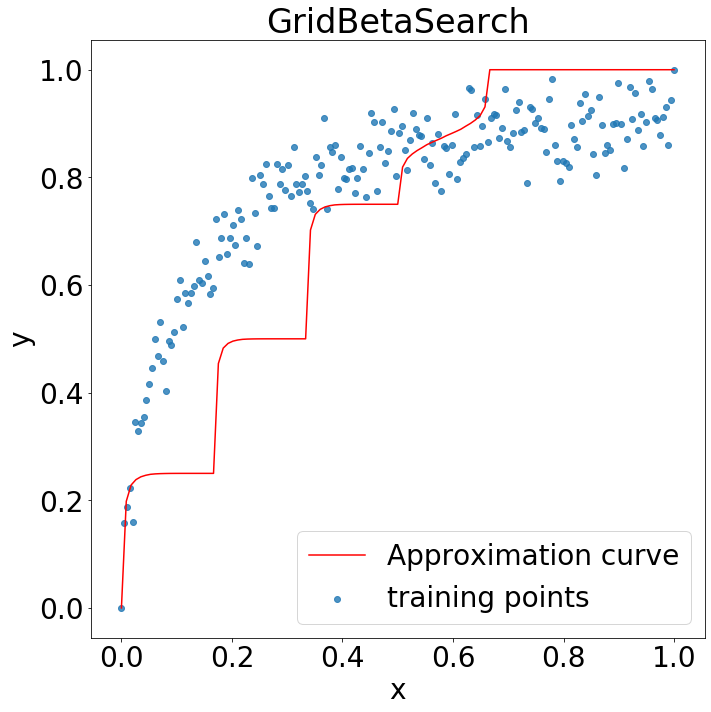

In [129]:
import time
dataset = Pretty_datasets[0]
#for i, dataset in enumerate(Pretty_datasets):
gso2 = GridSearchOpt()
start_time = time.time()
lossg, path = gso2.fit(dataset[:, 0], dataset[:, 1], nx=6, ny=4) # 256, 256
print("Excecution time =", (time.time() - start_time) / 60, "min")
print("loss =", lossg)
print("nx, ny =", gso2.nx, gso2.ny)
gso2.LinPlot(dataset[:, 0], dataset[:, 1])